## <small>
Copyright (c) 2017-21 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning: A Visual Approach
## by Andrew Glassner, https://glassner.com
### Order: https://nostarch.com/deep-learning-visual-approach
### GitHub: https://github.com/blueberrymusic
------

### What's in this notebook

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is cleaned up a bit from the original code that I hacked together, and is only lightly commented. I wrote the code to be easy to interpret and understand, even for those who are new to Python. I tried never to be clever or even more efficient at the cost of being harder to understand. The code is in Python3, using the versions of libraries as of April 2021. 

This notebook may contain additional code to create models and images not in the book. That material is included here to demonstrate additional techniques.

Note that I've included the output cells in this saved notebook, but Jupyter doesn't save the variables or data that were used to generate them. To recreate any cell's output, evaluate all the cells from the start up to that cell. A convenient way to experiment is to first choose "Restart & Run All" from the Kernel menu, so that everything's been defined and is up to date. Then you can experiment using the variables, data, functions, and other stuff defined in this notebook.

## Chapter 2: Essential Statistics

Miscellaneous figures for Chapter 2

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import seaborn as sns ; sns.set()

In [2]:
# Make a File_Helper for saving and loading files.

save_files = False

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

In [3]:
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.labelpad'] = 8
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14

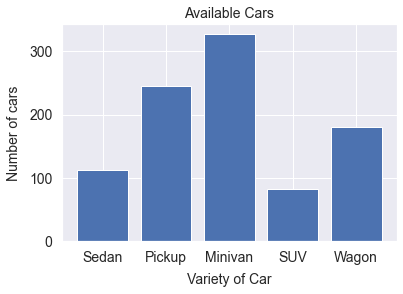

In [4]:
# Show the number of different types of vehicles on the lot
fig = plt.figure(figsize=(6,4))
car_names = ['Sedan', 'Pickup', 'Minivan', 'SUV', 'Wagon']
heights = [113, 245, 327, 83, 181]
xp = range(len(car_names))
plt.bar(xp, heights, align='center')
plt.xticks(xp, car_names)
plt.yticks([0, 100, 200, 300],[0, 100, 200, 300])
plt.xlabel('Variety of Car')
plt.ylabel('Number of cars')
plt.title('Available Cars')
file_helper.save_figure('car-bars')
plt.show()

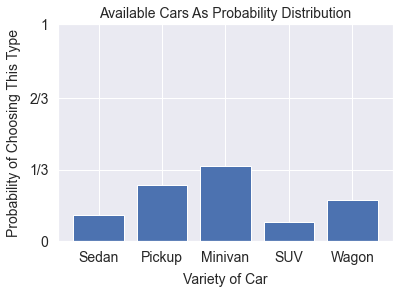

In [5]:
# scale the vehicle probabilities so they add to 1
fig = plt.figure(figsize=(6,4))
car_names = ['Sedan', 'Pickup', 'Minivan', 'SUV', 'Wagon']
heights = [113, 245, 327, 83, 181]
heights = heights/np.sum(heights)
xp = range(len(car_names))
plt.bar(xp, heights, align='center')
plt.xticks(xp, car_names)
plt.yticks([0, .33, .66, 1],[0, '1/3', '2/3', 1])
plt.xlabel('Variety of Car')
plt.ylabel('Probability of Choosing This Type')
plt.title('Available Cars As Probability Distribution')
file_helper.save_figure('car-bars-normalized')
plt.show()

total_area= 0.5655930253557464
1.0


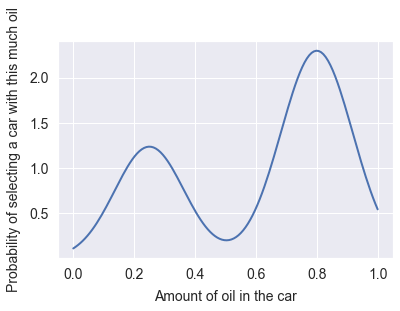

In [32]:
# draw a nice continuous distribution
def continuous_dist(x):
    v1 = 0.7 * np.exp(0.6 * -np.power(8*(x-0.25), 2))
    v2 = 1.3 * np.exp(1.0 * -np.power(6*(x-0.8), 2))
    return v1+v2

xs = np.linspace(0, 1, 130)
ys = [continuous_dist(x) for x in xs]

# Thanks Viktor Korsun for pointing out I didn't correctly
# normalize the curve in the original version of this notebook.
box_width = xs[1]-xs[0] # the width of one box
total_area = np.sum(ys * box_width) # the sum of the areas of all the boxes
normalized_ys = ys / total_area

plt.plot(xs, normalized_ys, lw=2)
plt.xlabel('Amount of oil in the car')
plt.ylabel('Probability of selecting a car with this much oil')
file_helper.save_figure('continuous-pdf')
plt.show()

In [29]:
ddd = [(ys[i] - ys[i-1])/2. for i in range(1, len(ys))]
print(ys[3], ddd[3])

0.09720517834419712 0.006896196471964926


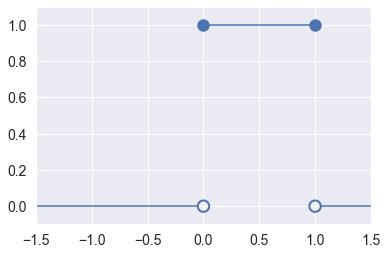

In [7]:
# Draw the graph for a uniform distribution [0,1]
plt_blue = '#4d74ae'  # matplotlib default blue

plt.plot([-1.5, -0.05],[0,0], c=plt_blue)
plt.scatter([0],[0], s=130, facecolors='none', edgecolors=plt_blue, lw=2)
plt.scatter([0],[1], s=130, c=plt_blue)
plt.plot([0,1],[1,1], c=plt_blue)
plt.scatter([1],[1], s=130, c=plt_blue)
plt.scatter([1],[0], s=130, facecolors='none', edgecolors=plt_blue, lw=2)
plt.plot([1.05, 1.5],[0,0], c=plt_blue)

plt.xlim(-1.5, 1.5)
plt.ylim(-.1, 1.1)
file_helper.save_figure('uniform-box-distribution')
plt.show()

In [8]:
# Height of a Gaussian (mu, sigma-squared) at x
def gaussian(x, mu, sigma2):
    s2 = 2*sigma2
    f = 1/math.sqrt(math.pi * s2)
    g = np.power((x-mu), 2)/s2
    return f * np.exp(-g)

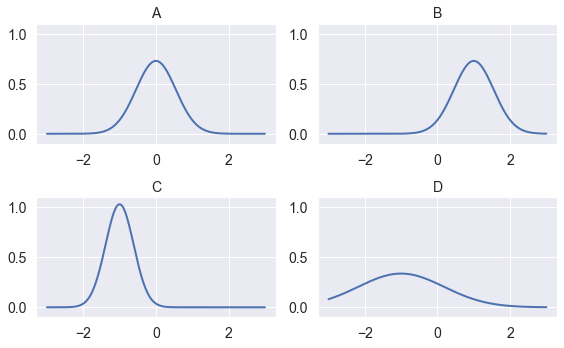

In [9]:
# Show a bunch of different Gaussians
xs = np.linspace(-3, 3, 200)

mu_list = [0, 1, -1, -1]
sigma_list = [0.3, 0.3, 0.15, 1.4]  # really sigma^2
plt.figure(figsize=(8,5))
subplot_num = 1

for mu, sigma in zip(mu_list, sigma_list):
    plt.subplot(2, 2, subplot_num)
    ys = [gaussian(x, mu, sigma) for x in xs]
    plt.plot(xs, ys, lw=2)
    plt.ylim(-0.1, 1.1)
    plt.title('ABCD'[subplot_num-1])
    subplot_num += 1

plt.tight_layout()
file_helper.save_figure('gaussians')
plt.show()

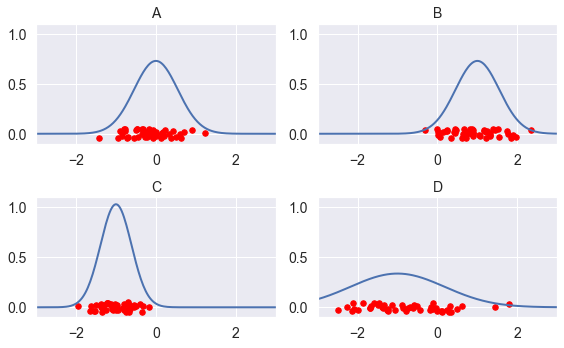

In [10]:
# Show points randomly drawn from the Gaussians above
file_helper.save_figures = True
np.random.seed(45)
xs = np.linspace(-3, 3, 200)

mu_list = [0, 1, -1, -1]
sigma_list = [0.3, 0.3, 0.15, 1.4]
plt.figure(figsize=(8,5))
subplot_num = 1
num_samples = 50

for mu, sigma in zip(mu_list, sigma_list):
    plt.subplot(2, 2, subplot_num)
    ys = [gaussian(x, mu, sigma) for x in xs]
    plt.plot(xs, ys, lw=2)
    drawn_samples = np.random.normal(loc=mu, scale=math.sqrt(sigma), size=num_samples)   
    plt.scatter(drawn_samples, np.random.uniform(-.05, .05, len(drawn_samples)), c='red', s=30)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-3, 3)
    plt.title('ABCD'[subplot_num-1])
    subplot_num += 1

plt.tight_layout()
file_helper.save_figure('gaussians-with-samples')
plt.show()

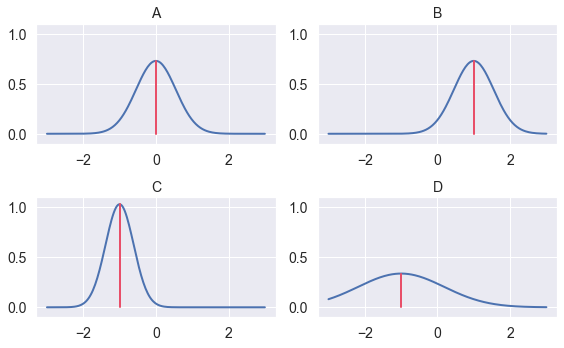

In [11]:
# Show means of the Gaussians above
xs = np.linspace(-3, 3, 200)

mu_list = [0, 1, -1, -1]
sigma_list = [0.3, 0.3, 0.15, 1.4]
plt.figure(figsize=(8,5))
subplot_num = 1

for mu, sigma in zip(mu_list, sigma_list):
    plt.subplot(2, 2, subplot_num)
    ys = [gaussian(x, mu, sigma) for x in xs]
    plt.plot(xs, ys, lw=2)
    plt.plot([mu, mu],[0,gaussian(mu, mu, sigma)], lw=2, color='#E84F69')
    plt.ylim(-0.1, 1.1)
    plt.title('ABCD'[subplot_num-1])
    subplot_num += 1

plt.tight_layout()
file_helper.save_figure('gaussians-with-means')
plt.show()

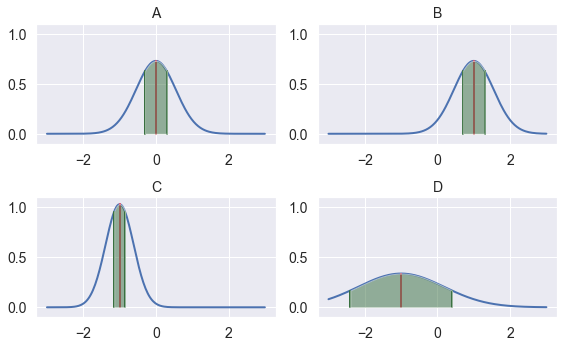

In [12]:
# Show standard deviations
xs = np.linspace(-3, 3, 200)

mu_list = [0, 1, -1, -1]
sigma_list = [0.3, 0.3, 0.15, 1.4]
plt.figure(figsize=(8,5))
subplot_num = 1

for mu, sigma in zip(mu_list, sigma_list):
    plt.subplot(2, 2, subplot_num)
    ys = [gaussian(x, mu, sigma) for x in xs]
    plt.plot(xs, ys, lw=2)
    plt.plot([mu, mu],[0,gaussian(mu, mu, sigma)], color='#E84F69', lw=2, zorder=10)
    plt.plot([mu-sigma,mu-sigma],[0,gaussian(mu-sigma, mu, sigma)], lw=2, color='#386F40')
    plt.plot([mu+sigma,mu+sigma],[0,gaussian(mu+sigma, mu, sigma)], lw=2, color='#386F40')
    fill_xs = np.linspace(mu-sigma, mu+sigma, 50)
    fill_ys = [gaussian(x, mu, sigma) for x in fill_xs]
    ax = plt.gca()
    ax.fill_between(fill_xs, 0, fill_ys, facecolor='#386F40', alpha=0.5, zorder=20)
    plt.ylim(-0.1, 1.1)
    plt.title('ABCD'[subplot_num-1])
    subplot_num += 1

plt.tight_layout()
file_helper.save_figure('gaussians-with-stddevs')
plt.show()

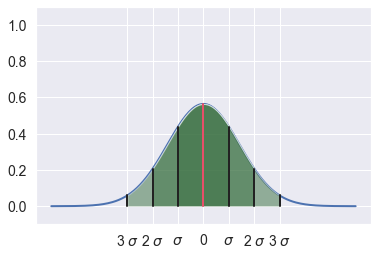

In [13]:
# Show 1, 2, and 3 standard deviations
xs = np.linspace(-3, 3, 200)

mu = 0
sigma = 0.5
ys = [gaussian(x, mu, sigma) for x in xs]
fig = plt.figure()
ax = plt.gca()

plt.plot(xs, ys, lw=2)
plt.plot([mu, mu],[0,gaussian(mu, mu, sigma)], lw=2, color='#E84F69', zorder=20)

for steps in [1, 2, 3]:
    sigma_n = steps * sigma
    plt.plot([mu-sigma_n,mu-sigma_n],[0,gaussian(mu-sigma_n, mu, sigma)], lw=2, color='#222222', zorder=20)
    plt.plot([mu+sigma_n,mu+sigma_n],[0,gaussian(mu+sigma_n, mu, sigma)], lw=2, color='#222222', zorder=20)
    fill_xs = np.linspace(mu-sigma_n, mu+sigma_n, 50)
    fill_ys = [gaussian(x, mu, sigma) for x in fill_xs]
    ax.fill_between(fill_xs, 0, fill_ys, facecolor='#386F40', alpha=0.5, zorder=10)

# On my system thsese sigma characters come out ugly, so replace them in Illustrator
plt.ylim(-0.1, 1.1)
plt.xticks([-3*sigma,-2*sigma,-sigma,0,sigma,2*sigma,3*sigma],
           ['3 $\sigma$','2 $\sigma$', '$\sigma$', 0, '$\sigma$', '2 $\sigma$', '3 $\sigma$'])

file_helper.save_figure('gaussian-multi-stddevs')
plt.show()

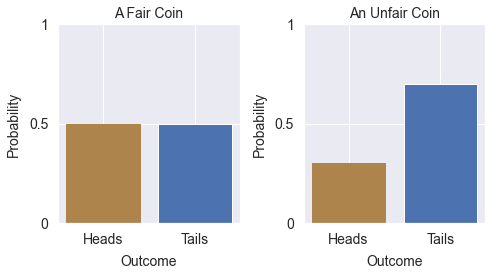

In [14]:
# Bernoulli distribution

fig = plt.figure(figsize=(7,4))
plt.subplot(1, 2, 1)
barlist = plt.bar([0,1],[.5,.5], align='center')
barlist[0].set_color('#ae844d')
plt.xticks([0,1],['Heads','Tails'])
plt.yticks([0,.5,1],[0,.5,1])
plt.ylim(0, 1)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('A Fair Coin')

plt.subplot(1, 2, 2)
barlist = plt.bar([0,1],[.3,.7], align='center')
barlist[0].set_color('#ae844d')
plt.xticks([0,1],['Heads','Tails'])
plt.yticks([0,.5,1],[0,.5,1])
plt.ylim(0, 1)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('An Unfair Coin')

plt.tight_layout()

file_helper.save_figure('bernoulli')
plt.show()

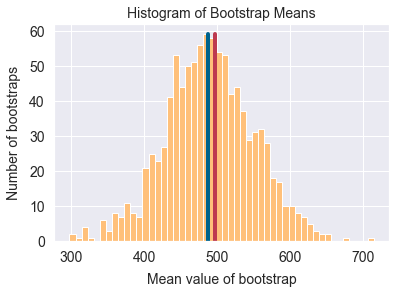

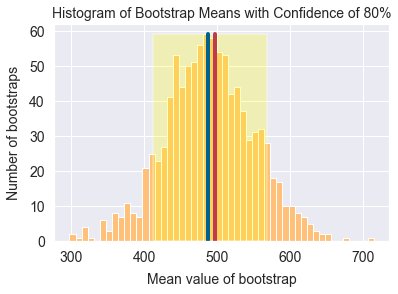

In [15]:
# Show the histograms for bootstrapping discussion

def get_population(num_elements, low, high):
    population = []
    for i in range(num_elements):
        element = int(np.random.uniform(low, high))
        population.append(element)
    return population

def get_sample_set(population, num_elements):
    sample_set = np.random.choice(a=population, size=num_elements, replace=False)
    return sample_set

def get_bootstrap(sample_set, num_elements):
    bootstrap = np.random.choice(a=sample_set, size=num_elements, replace=True)
    return bootstrap

def do_bootstraps(population_size, population_range, sample_set_size, bootstrap_size, num_boostraps):
    np.random.seed(42)
    population = get_population(population_size, 0, population_range)
    sample_set = get_sample_set(population, sample_set_size)
    bootstrap_list = []
    for i in range(num_boostraps):
        bootstrap = get_bootstrap(sample_set, bootstrap_size)
        bootstrap_list.append(bootstrap)
    population_mean = np.mean(population)
    sample_set_mean = np.mean(sample_set)
    bootstrap_means = [np.mean(bootstrap) for bootstrap in bootstrap_list]
    
    n, bins, hpatches = plt.hist(bootstrap_means, 50, color='#FFC07A')
    plt.plot([sample_set_mean, sample_set_mean], [0, max(n)], color='#00638C', lw=4)
    plt.plot([population_mean, population_mean], [0, max(n)], color='#BD3A50', lw=4)
    plt.title('Histogram of Bootstrap Means')
    plt.xlabel('Mean value of bootstrap')
    plt.ylabel('Number of bootstraps')
    file_helper.save_figure('bootstrap-histogram')
    plt.show()
    
    n, bins, hpatches = plt.hist(bootstrap_means, 50, color='#FFC07A')
    plt.plot([sample_set_mean, sample_set_mean], [0, max(n)], color='#00638C', lw=4)
    plt.plot([population_mean, population_mean], [0, max(n)], color='#BD3A50', lw=4)
    confidence = 0.8
    gap = (1-confidence)/2
    sorted_bootstrap_means = sorted(bootstrap_means)
    low_index = int(gap * len(sorted_bootstrap_means))
    high_index = int((1-gap) * len(sorted_bootstrap_means))
    low_value = sorted_bootstrap_means[low_index]
    high_value = sorted_bootstrap_means[high_index]
    rect_left = low_value
    rect_bottom = 0
    rect_width = high_value-low_value
    rect_height = max(n)
    currentAxis = plt.gca()
    conf_rect = patches.Rectangle((rect_left, rect_bottom), 
                             rect_width, rect_height, facecolor="yellow", 
                             alpha=0.25, lw=2)
    currentAxis.add_patch(conf_rect)
    plt.title('Histogram of Bootstrap Means with Confidence of '+str(int(100*confidence))+'%')
    plt.xlabel('Mean value of bootstrap')
    plt.ylabel('Number of bootstraps')
    file_helper.save_figure('bootstrap-histogram-confidence')
    plt.show()
    
do_bootstraps(population_size=5000, population_range=1000, 
              sample_set_size=500, bootstrap_size=20, num_boostraps=1000)

In [16]:
# Data for the Anscombe quartet 
Anscombe = [
    [
        [10.0, 8.04], [8.0, 6.95], [13.0, 7.58], [9.0, 8.81], [11.0, 8.33],
        [14.0, 9.96], [6.0, 7.24], [4.0, 4.26], [12.0, 10.84], [7.0, 4.82], [5.0, 5.68]
    ],[
        [10.0, 9.14], [8.0, 8.14], [13.0, 8.74], [9.0, 8.77], [11.0, 9.26],
        [14.0, 8.10], [6.0, 6.13], [4.0, 3.10], [12.0, 9.13], [7.0, 7.26], [5.0, 4.74]
    ],[
        [10.0, 7.46], [8.0, 6.77], [13.0, 12.74], [9.0, 7.11], [11.0, 7.81],
        [14.0, 8.84], [6.0, 6.08], [4.0, 5.39], [12.0, 8.15], [7.0, 6.42], [5.0, 5.73]
    ],[
        [8.0, 6.58], [8.0, 5.76], [8.0, 7.71], [8.0, 8.84], [8.0, 8.47], 
        [8.0, 7.04], [8.0, 5.25], [19.0, 12.50], [8.0, 5.56], [8.0, 7.91], [8.0, 6.89]
    ]
    ]

Anscombe_clrs = ['#730046', '#FFCD30', '#E88E34', '#C93F0F']
Anscombe_markers = ['o', '^', 's', 'D']


In [17]:
# print statistics for the Anscombe quartet
for dataset in range(4):
    xs = [v[0] for v in Anscombe[dataset]]
    ys = [v[1] for v in Anscombe[dataset]]
    xmean = np.mean(xs)
    xstd = np.std(xs)
    ymean = np.mean(ys)
    ystd = np.std(ys)
    corr = np.corrcoef(xs, ys)
    line = np.polyfit(xs, ys, 1)
    print("---- quartet ",dataset)
    print("xmean= %3.2f x stddev= %3.2f" % (xmean, xstd))
    print("ymean= %3.2f y stddev= %3.2f" % (ymean, ystd))
    print("correlation x and y = %3.2f" % corr[0][1])
    print("best line slope %3.2f and intercept %3.2f" % (line[0], line[1]))

---- quartet  0
xmean= 9.00 x stddev= 3.16
ymean= 7.50 y stddev= 1.94
correlation x and y = 0.82
best line slope 0.50 and intercept 3.00
---- quartet  1
xmean= 9.00 x stddev= 3.16
ymean= 7.50 y stddev= 1.94
correlation x and y = 0.82
best line slope 0.50 and intercept 3.00
---- quartet  2
xmean= 9.00 x stddev= 3.16
ymean= 7.50 y stddev= 1.94
correlation x and y = 0.82
best line slope 0.50 and intercept 3.00
---- quartet  3
xmean= 9.00 x stddev= 3.16
ymean= 7.50 y stddev= 1.94
correlation x and y = 0.82
best line slope 0.50 and intercept 3.00


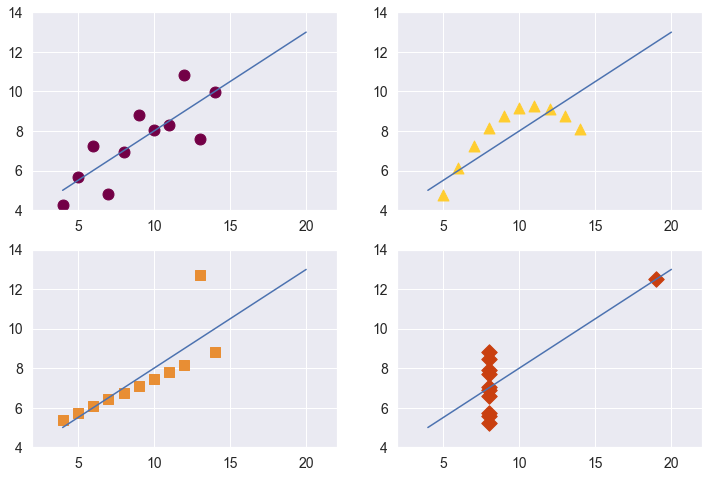

In [18]:
# show the Anscombe quartet
fig = plt.figure(figsize=(12,8))
for dataset in range(4):
    xs = [v[0] for v in Anscombe[dataset]]
    ys = [v[1] for v in Anscombe[dataset]]
    plt.subplot(2, 2, dataset+1)
    plt.scatter(xs, ys, s=120, marker=Anscombe_markers[dataset], c=Anscombe_clrs[dataset])
    line = np.polyfit(xs, ys, 1)
    plt.plot([4,20],[(4*line[0])+line[1], (20*line[0])+line[1]])
    plt.xlim(2, 22)
    plt.ylim(4, 14)

file_helper.save_figure('anscombe-quartet')
plt.show()

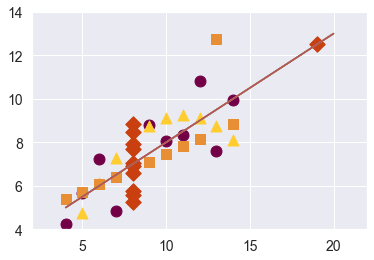

In [19]:
# show all four dataset in the Anscombe quartet

for dataset in range(4):
    xs = [v[0] for v in Anscombe[dataset]]
    ys = [v[1] for v in Anscombe[dataset]]
    plt.scatter(xs, ys, s=120, marker=Anscombe_markers[dataset], c=Anscombe_clrs[dataset])
    line = np.polyfit(xs, ys, 1)
    plt.plot([4,20],[(4*line[0])+line[1], (20*line[0])+line[1]])
plt.xlim(2, 22)
plt.ylim(4, 14)

file_helper.save_figure('anscombe-quartet-superimposed')
plt.show()